In [1]:
! pip install pysastrawi

     |████████████████████████████████| 210 kB 29.3 MB/s 


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/byu/data0till_done.csv')
df

,id,created_at,source,label,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,1478564382783110000,Wed Jan 05 03:09:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id apa aku harus nunggu ber-jam² hingga a...,nunggu ber jam hingga aplikasi terbuka,in,0,0,rickjak16,False,NaN,byu_id,Planet Namex,NaN
1,1478561754284060000,Wed Jan 05 02:59:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,Min @byu_id tolong jawab lah. Jangan di skip.,min jawab skip,in,0,0,Oghee_1900,NaN,NaN,byu_id,"DKI Jakarta, Indonesia",NaN
2,1478558087564830000,Wed Jan 05 02:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id min beberapa hari belakangan ini kok s...,min sinyal by tidak stabil hp nokia pluslokasi...,in,0,0,Andi_Pi14,NaN,NaN,byu_id,Indonesia,NaN
3,1478556956310650000,Wed Jan 05 02:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,ada\n(selalu ada buat teman)\ngokil\n(tingkah ...,teman gila tingkah gila kumpul kepomasa sih,in,0,0,AlRob1179,NaN,NaN,byu_id,"Medan Timur, Indonesia",NaN
4,1478555575197730000,Wed Jan 05 02:34:54 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,@SpeciaIONEe @worksfess @IndosatCare @triindon...,mengadopsi bebas aktif nomor hahaha,in,0,0,bangvalash,NaN,NaN,"SpeciaIONEe, worksfess, IndosatCare, triindone...","Mars, PA",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,1475392292517140000,Wed Jan 05 03:29:37 +0000 2022,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",netral,@byu_id min minta settingan APN dong,admin settingan apn,in,0,0,ErwinAvrio,NaN,NaN,byu_id,NaN,NaN
2201,1475392195599290000,Fri Dec 31 16:16:30 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",negatif,jahat banget kamu nyuruh aku istirahat duluan ...,jahat banget nyuruh istirahat duluan malam,in,0,0,rmd_azhari,NaN,NaN,byu_id,NaN,NaN
2202,1475392180348850000,Thu Dec 30 05:15:39 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",positif,Selamat tiga bulan bersama kak:) https://t.co/...,selamat kak,in,6,0,byu_id,False,NaN,NaN,Indonesia,NaN
2203,1475391957635530000,Thu Dec 30 04:12:01 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",negatif,LU NIAT BIKIN PROVIDER GAKSI ANJG EMOSI @byu_id,niat bikin provider gaksi anjg emosi,in,0,0,maruk0chann,NaN,NaN,byu_id,┊͙ ˘͈ᵕ˘͈,NaN


# Using Naive Bayes

In [5]:
df.head()

,id,created_at,source,label,original_text,clean_text,lang,favorite_count,retweet_count,original_author,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,1478564382783110000,Wed Jan 05 03:09:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id apa aku harus nunggu ber-jam² hingga a...,nunggu ber jam hingga aplikasi terbuka,in,0,0,rickjak16,False,NaN,byu_id,Planet Namex,NaN
1,1478561754284060000,Wed Jan 05 02:59:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,Min @byu_id tolong jawab lah. Jangan di skip.,min jawab skip,in,0,0,Oghee_1900,NaN,NaN,byu_id,"DKI Jakarta, Indonesia",NaN
2,1478558087564830000,Wed Jan 05 02:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",negatif,@byu_id min beberapa hari belakangan ini kok s...,min sinyal by tidak stabil hp nokia pluslokasi...,in,0,0,Andi_Pi14,NaN,NaN,byu_id,Indonesia,NaN
3,1478556956310650000,Wed Jan 05 02:40:23 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,ada\n(selalu ada buat teman)\ngokil\n(tingkah ...,teman gila tingkah gila kumpul kepomasa sih,in,0,0,AlRob1179,NaN,NaN,byu_id,"Medan Timur, Indonesia",NaN
4,1478555575197730000,Wed Jan 05 02:34:54 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",netral,@SpeciaIONEe @worksfess @IndosatCare @triindon...,mengadopsi bebas aktif nomor hahaha,in,0,0,bangvalash,NaN,NaN,"SpeciaIONEe, worksfess, IndosatCare, triindone...","Mars, PA",NaN


In [6]:
df.label.value_counts()

negatif    1235
netral      759
positif     211
Name: label, dtype: int64

In [7]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df.clean_text, df.label, test_size=0.2, stratify=df.label)

## Using TfidfVectorizer

In [8]:
stp = StopWordRemoverFactory().get_stop_words()
vect = TfidfVectorizer()

In [9]:
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)

In [10]:
#SMOTE

#SMOTE METHOD
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(df.label)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_train_vec, y_train)

counter = Counter(y_smote)
print('After :', counter)

Before : Counter({'negatif': 1235, 'netral': 759, 'positif': 211})
After : Counter({'negatif': 988, 'netral': 988, 'positif': 988})


In [19]:
# training naive bayes
nb1 = MultinomialNB()
nb1.fit(X_smote, y_smote)

#Random forest
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X_smote, y_smote)

#SVC 
from sklearn.svm import SVC
svc1 = SVC()
svc1.fit(X_smote, y_smote)

SVC()

In [20]:
# evaluasi
y_pred_nb1 = nb1.predict(X_test_vec)
print(classification_report(y_test, y_pred_nb1))

y_pred_rf1 = rf1.predict(X_test_vec)
print(classification_report(y_test, y_pred_rf1))

y_pred_svc1 = svc1.predict(X_test_vec)
print(classification_report(y_test, y_pred_svc1))

              precision    recall  f1-score   support

     negatif       0.81      0.87      0.84       247
      netral       0.75      0.64      0.69       152
     positif       0.58      0.62      0.60        42

    accuracy                           0.77       441
   macro avg       0.71      0.71      0.71       441
weighted avg       0.77      0.77      0.76       441

              precision    recall  f1-score   support

     negatif       0.89      0.83      0.86       247
      netral       0.72      0.86      0.78       152
     positif       0.71      0.48      0.57        42

    accuracy                           0.81       441
   macro avg       0.78      0.72      0.74       441
weighted avg       0.82      0.81      0.81       441

              precision    recall  f1-score   support

     negatif       0.79      0.91      0.85       247
      netral       0.76      0.70      0.73       152
     positif       0.88      0.36      0.51        42

    accuracy        

In [21]:
#save model
import joblib
joblib.dump(rf1, 'model_rf_tfidf.pkl')

['model_rf_tfidf.pkl']

In [22]:
userText = ['ihh lemot ya byu']
label = joblib.load('model_rf_tfidf.pkl')
userText = vect.transform(userText)
pred = label.predict(userText)
pred

array(['netral'], dtype=object)

## Using CountVectorizer

In [14]:
stp = StopWordRemoverFactory().get_stop_words()
vect_count = CountVectorizer()

In [15]:
X_train_vec_count = vect_count.fit_transform(X_train)
X_test_vec_count = vect_count.transform(X_test)

In [16]:
#SMOTE

#SMOTE METHOD
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(df.label)
print('Before :', counter)

#Oversampling of the dataset using SMOTE
smt = SMOTE()
X_smote_count, y_smote_count = smt.fit_resample(X_train_vec_count, y_train)

counter = Counter(y_smote_count)
print('After :', counter)

Before : Counter({'negatif': 1235, 'netral': 759, 'positif': 211})
After : Counter({'negatif': 988, 'netral': 988, 'positif': 988})


In [17]:
# training naive bayes
nb = MultinomialNB()
nb.fit(X_smote_count, y_smote_count)

#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_smote_count, y_smote_count)

#SVC 
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_smote_count, y_smote_count)

SVC()

In [18]:
# evaluasi
y_pred_nb = nb.predict(X_test_vec)
print(classification_report(y_test, y_pred_nb))

y_pred_rf = rf.predict(X_test_vec)
print(classification_report(y_test, y_pred_rf))

y_pred_svc = svc.predict(X_test_vec)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

     negatif       0.79      0.89      0.84       247
      netral       0.76      0.59      0.66       152
     positif       0.52      0.60      0.56        42

    accuracy                           0.76       441
   macro avg       0.69      0.69      0.68       441
weighted avg       0.76      0.76      0.75       441

              precision    recall  f1-score   support

     negatif       0.97      0.16      0.27       247
      netral       0.61      0.28      0.39       152
     positif       0.12      0.95      0.21        42

    accuracy                           0.28       441
   macro avg       0.57      0.46      0.29       441
weighted avg       0.77      0.28      0.31       441

              precision    recall  f1-score   support

     negatif       0.98      0.21      0.35       247
      netral       0.68      0.45      0.54       152
     positif       0.14      0.98      0.25        42

    accuracy        

# Using Deep Learning

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
df.label = df.label.map({"netral" : 0, "positif": 1, "negatif":2})

In [25]:
df.label.value_counts()

2    1235
0     759
1     211
Name: label, dtype: int64

In [26]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [27]:
import random
random_index = random.randint(0, len(train_df) - 5)
for row in train_df[["clean_text", "label"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  if target == 0:
    print(f"Target: {target} (NETRAL)")
  elif target == 1:
    print(f"Target: {target} (POSITIF)")
  elif target == 2:
    print(f"Target: {target} (NEGATIF)")
  print(f"Teks: {text}\n")
  print("---\n")

Target: 2 (NEGATIF)
Teks: memang kawan tidak tuh website apps tidak diakses solusinya reset networknya pakai airplane mode pindah mode tidak tidak balikin tidak

---

Target: 1 (POSITIF)
Teks: self hadiah kumandi air dinginkopi sugarmaraton dracin seharian

---

Target: 2 (NEGATIF)
Teks: pemeliharaan sistem beli pakettttt

---

Target: 2 (NEGATIF)
Teks: cek kartu xl sisa mb apk nya pekok

---

Target: 0 (NETRAL)
Teks: min cek pesan

---



In [28]:
# get ready for target
from tensorflow.keras.utils import to_categorical

X_train, y_train = train_df.clean_text, train_df.label
X_test, y_test = test_df.clean_text, test_df.label

def prepare_target(y_train, y_test):
  y_train_enc = to_categorical(y_train)
  y_test_enc = to_categorical(y_test)
  return y_train_enc, y_test_enc

y_train, y_test = prepare_target(y_train, y_test)

In [29]:
# split train-val
train_sent, val_sent, train_labels, val_labels = train_test_split(X_train.to_numpy(),
                                                                   y_train,
                                                                   test_size=0.2)

In [30]:
train_sent[:10], train_labels[:10]

(array(['paket telepon sepuasnya by',
        'bukan surabaya om perbedaan live on xl persis by telkomsel anak muda kualitas jaringannya dimuda in',
        'cek pesan minnn',
        'wahh bukan aplikasi nya eror bang coba refresh deh kaget lihat harga segitu',
        'selamat ulang yaa kak semoga suka kado nindy', 'cek pesan min',
        'sungguh amazing indah promo naikin gaji marketingnya',
        'wakakaa ee',
        'min jaringan lambat parah promo doang duar der dor jaringan kedodoran paket internet gb buka youtube buffering',
        'sinyalnya ngaco sebentar mode pesawat pindah xl'], dtype=object),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]], dtype=float32))

# Tokenization

In [31]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [32]:
round(sum([len(i.split()) for i in train_sent])/len(train_sent))

7

In [33]:
# setup text vect
max_vocab_length = 4000
max_length = 15

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length)

In [34]:
# vektorisasi teks
text_vectorization.adapt(train_sent)

In [35]:
# tweet baru
sample_tweet = "duh kenapa deh koneksi byu lemot banget"
text_vectorization([sample_tweet])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  1,   1,  85,  69,  14, 340,  18,   0,   0,   0,   0,   0,   0,
          0,   0]])>

# Embedding

In [36]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [37]:
random_tweet = random.choice(train_sent)
print(f"Teks Asli : {random_tweet}\n")

sample_embedded = embedding(text_vectorization([random_tweet]))
sample_embedded.shape

Teks Asli : transfer pulsa



TensorShape([1, 15, 128])

# Modeling

In [38]:
# fc NN

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_nlp_fc')

In [39]:
# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [40]:
model_1.summary()

Model: "model_nlp_fc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           512000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 512,387
Trainable params: 512,387
Non-tr

In [41]:
val_sent.shape

(353,)

In [42]:
val_labels

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [43]:
model_1_hist = model_1.fit(train_sent,
                           train_labels,
                           epochs=25,
                           validation_data=(val_sent, val_labels))

Epoch 1/25
45/45 [==============================] - 1s 11ms/step - loss: 1.0057 - accuracy: 0.5748 - val_loss: 0.9408 - val_accuracy: 0.6034
Epoch 2/25
45/45 [==============================] - 0s 6ms/step - loss: 0.8670 - accuracy: 0.6038 - val_loss: 0.8471 - val_accuracy: 0.6799
Epoch 3/25
45/45 [==============================] - 0s 6ms/step - loss: 0.7525 - accuracy: 0.7789 - val_loss: 0.7607 - val_accuracy: 0.7535
Epoch 4/25
45/45 [==============================] - 0s 6ms/step - loss: 0.6475 - accuracy: 0.8320 - val_loss: 0.6950 - val_accuracy: 0.7620
Epoch 5/25
45/45 [==============================] - 0s 6ms/step - loss: 0.5652 - accuracy: 0.8427 - val_loss: 0.6513 - val_accuracy: 0.7564
Epoch 6/25
45/45 [==============================] - 0s 6ms/step - loss: 0.5005 - accuracy: 0.8590 - val_loss: 0.6203 - val_accuracy: 0.7649
Epoch 7/25
45/45 [==============================] - 0s 7ms/step - loss: 0.4473 - accuracy: 0.8731 - val_loss: 0.5966 - val_accuracy: 0.7705
Epoch 8/25
45/45 [=

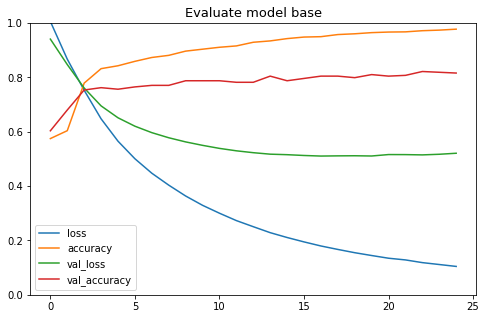

In [45]:
# Create plot of history model
import matplotlib.pyplot as plt


pd.DataFrame(model_1_hist.history).plot(figsize=(8, 5))
plt.title('Evaluate model base', fontsize=13)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
model_1.evaluate(val_sent, val_labels)

12/12 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.8159


[0.5207992196083069, 0.8158640265464783]

# LSTM

In [60]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.LSTM(128)(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_2 = tf.keras.Model(inputs, outputs, name="LSTM_model")

In [61]:
model_2.summary()

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           512000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 643,971
Trainable params: 643,971
Non-trainable params: 0
__________________________________________________

In [62]:
# compile model
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [63]:
model_2_hist = model_2.fit(train_sent,
                           train_labels,
                           epochs=15,
                           validation_data=(val_sent, val_labels))

Epoch 1/15
45/45 [==============================] - 4s 38ms/step - loss: 0.2414 - accuracy: 0.9291 - val_loss: 1.0135 - val_accuracy: 0.8329
Epoch 2/15
45/45 [==============================] - 1s 25ms/step - loss: 0.0321 - accuracy: 0.9922 - val_loss: 1.1952 - val_accuracy: 0.8074
Epoch 3/15
45/45 [==============================] - 1s 27ms/step - loss: 0.0228 - accuracy: 0.9950 - val_loss: 1.0797 - val_accuracy: 0.8215
Epoch 4/15
45/45 [==============================] - 1s 26ms/step - loss: 0.0252 - accuracy: 0.9936 - val_loss: 0.9539 - val_accuracy: 0.8102
Epoch 5/15
45/45 [==============================] - 1s 25ms/step - loss: 0.0205 - accuracy: 0.9929 - val_loss: 0.7687 - val_accuracy: 0.8357
Epoch 6/15
45/45 [==============================] - 1s 27ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 1.0310 - val_accuracy: 0.8130
Epoch 7/15
45/45 [==============================] - 1s 27ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.9741 - val_accuracy: 0.8215
Epoch 8/15
45

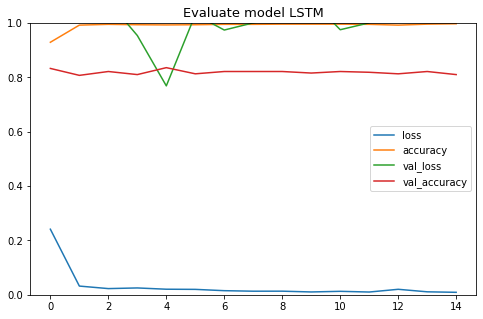

In [64]:
# Create plot of history model
import matplotlib.pyplot as plt


pd.DataFrame(model_2_hist.history).plot(figsize=(8, 5))
plt.title('Evaluate model LSTM', fontsize=13)
plt.gca().set_ylim(0, 1)
plt.show()

# GRU

In [54]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_3 = tf.keras.Model(inputs, outputs, name="GRU_model")

In [55]:
# compile model
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [56]:
model_3.summary()

Model: "GRU_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           512000    
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 549,443
Trainable params: 549,443
Non-trainable params: 0
___________________________________________________

In [57]:
model_3_hist = model_3.fit(train_sent,
                           train_labels,
                           epochs=15,
                           validation_data=(val_sent, val_labels))

Epoch 1/15
45/45 [==============================] - 3s 28ms/step - loss: 0.6826 - accuracy: 0.7023 - val_loss: 0.9434 - val_accuracy: 0.7677
Epoch 2/15
45/45 [==============================] - 1s 15ms/step - loss: 0.1677 - accuracy: 0.9305 - val_loss: 0.6597 - val_accuracy: 0.7960
Epoch 3/15
45/45 [==============================] - 1s 16ms/step - loss: 0.0463 - accuracy: 0.9865 - val_loss: 1.1278 - val_accuracy: 0.8074
Epoch 4/15
45/45 [==============================] - 1s 16ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 1.0269 - val_accuracy: 0.8187
Epoch 5/15
45/45 [==============================] - 1s 15ms/step - loss: 0.0220 - accuracy: 0.9929 - val_loss: 1.2388 - val_accuracy: 0.8045
Epoch 6/15
45/45 [==============================] - 1s 16ms/step - loss: 0.0278 - accuracy: 0.9922 - val_loss: 0.9904 - val_accuracy: 0.8130
Epoch 7/15
45/45 [==============================] - 1s 16ms/step - loss: 0.0154 - accuracy: 0.9936 - val_loss: 0.9266 - val_accuracy: 0.8215
Epoch 8/15
45

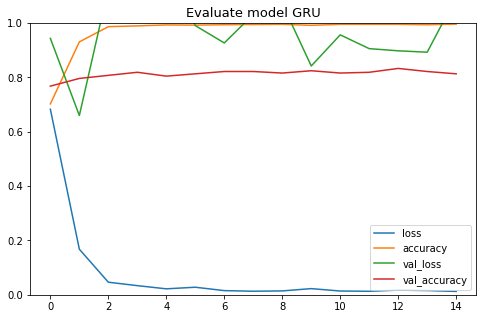

In [58]:
# Create plot of history model
import matplotlib.pyplot as plt


pd.DataFrame(model_3_hist.history).plot(figsize=(8, 5))
plt.title('Evaluate model GRU', fontsize=13)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
# inference new data

tweet_baru = [
            "anjirr lemot banget",
            "kenapa maintenance nya harus malem tahun baru sih, kesel deh",
            "wahh terima kasih byu udah dikasih kado kuota, jadi suka deh",
            "mohon maaf byu ini kenapa ya",
            "mohon dibenarkan aplikasinya, saya komplain gak dibalas di dm",
            "lemot banget, niat bikin provider gaksi"
]

hasil = model_3.predict(tweet_baru)
hasil.argmax(axis=1)

array([2, 2, 1, 0, 2, 2])